In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2,SelectKBest


In [3]:
data=pd.read_csv("train.csv")

In [5]:
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB
None


In [10]:
X=data.iloc[:,:20]
y=data.iloc[:,-1]

In [18]:
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X,y)

In [19]:
print(fit.scores_)

[1.41298666e+04 7.23232323e-01 6.48365906e-01 6.31010795e-01
 1.01351665e+01 1.52157239e+00 8.98391244e+01 7.45819631e-01
 9.59728626e+01 9.09755558e+00 9.18605355e+00 1.73635695e+04
 9.81058675e+03 9.31267519e+05 9.61487832e+00 1.64803191e+01
 1.32364000e+01 3.27642810e-01 1.92842942e+00 4.22090730e-01]


In [20]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [22]:
feature_scores=pd.concat([dfscores,dfcolumns],axis=1)
print(feature_scores)

                0              0
0    14129.866576  battery_power
1        0.723232           blue
2        0.648366    clock_speed
3        0.631011       dual_sim
4       10.135166             fc
5        1.521572         four_g
6       89.839124     int_memory
7        0.745820          m_dep
8       95.972863      mobile_wt
9        9.097556        n_cores
10       9.186054             pc
11   17363.569536      px_height
12    9810.586750       px_width
13  931267.519053            ram
14       9.614878           sc_h
15      16.480319           sc_w
16      13.236400      talk_time
17       0.327643        three_g
18       1.928429   touch_screen
19       0.422091           wifi


In [23]:
feature_scores.columns=["score","features"]

In [24]:
print(feature_scores)

            score       features
0    14129.866576  battery_power
1        0.723232           blue
2        0.648366    clock_speed
3        0.631011       dual_sim
4       10.135166             fc
5        1.521572         four_g
6       89.839124     int_memory
7        0.745820          m_dep
8       95.972863      mobile_wt
9        9.097556        n_cores
10       9.186054             pc
11   17363.569536      px_height
12    9810.586750       px_width
13  931267.519053            ram
14       9.614878           sc_h
15      16.480319           sc_w
16      13.236400      talk_time
17       0.327643        three_g
18       1.928429   touch_screen
19       0.422091           wifi


In [26]:
feature_scores.sort_values(by="score",ascending=False)

,score,features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

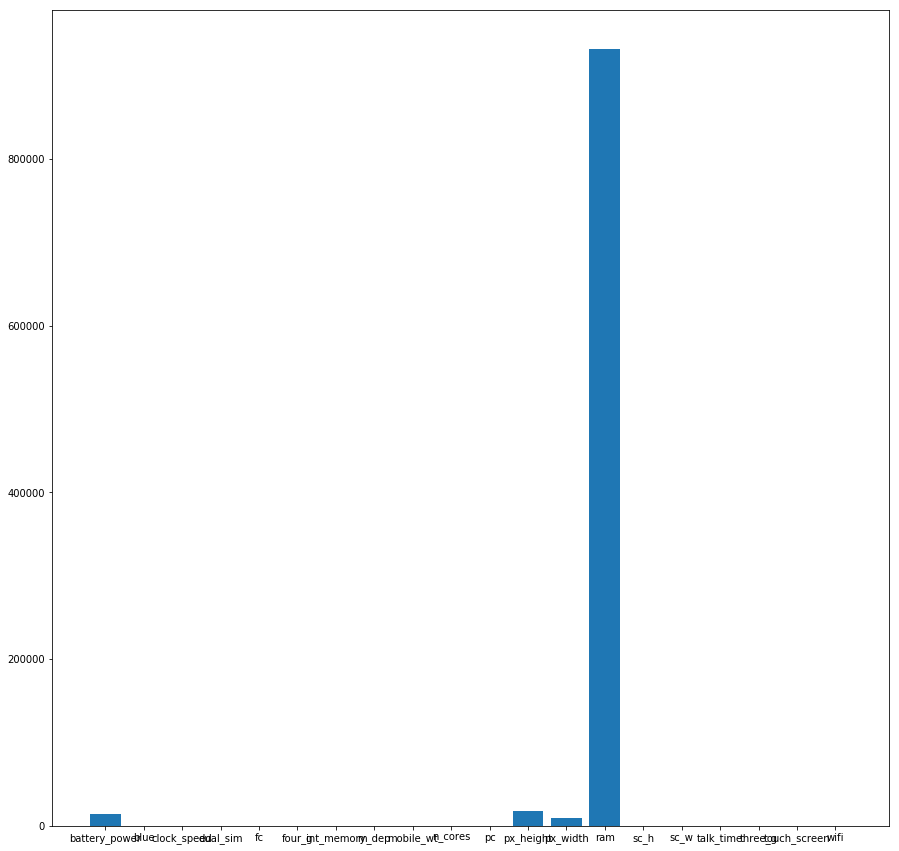

In [30]:
plt.figure(figsize=(15,15))
plt.bar(feature_scores["features"],feature_scores["score"])